In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report





**Loading the Dataset**

Loading the dataset into memory as a DataFrame object for further processing and analysis.

In [2]:
df = pd.read_csv('Crop_Recommendation.csv')
df
#Loading the dataset into memory as a DataFrame object for further processing and analysis.



,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


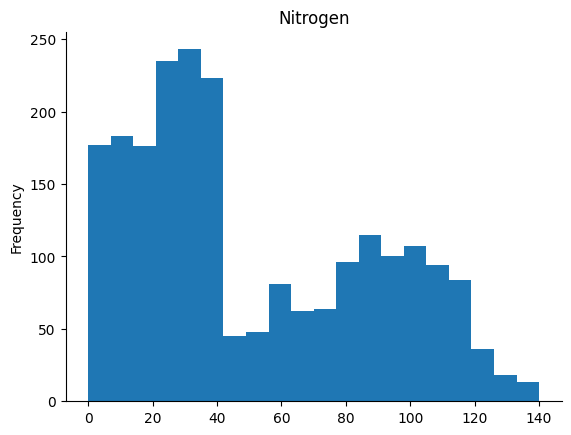

In [ ]:
# @title Nitrogen

from matplotlib import pyplot as plt
df['Nitrogen'].plot(kind='hist', bins=20, title='Nitrogen')
plt.gca().spines[['top', 'right',]].set_visible(False)

The dataset from kaggle is used to create a Machine Learning model that is capable of recommending the most suitable crop to be grown according to the specific climatic conditions and the soil nutrient levels.

Features:

Nitrogen - Nitrogen content in soil
Phosphorus - Phosphorus content in soil
Potassium -  Potassium content in soil
Temperature - temperature in degree Celsius
Humidity - relative humidity in %
pH_Value - pH value of the soil
Rainfall - rainfall in mm

Analysing the Data

In [ ]:



df.head()


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [ ]:
df.tail()
# shows the last 5 rows of the dataframe.

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [ ]:
df.shape
# shows the total number of (rows, columns) in the dataframe.

(2200, 8)

In [ ]:
df.columns
# shows the column names of the dataframe.

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [ ]:
df.duplicated().sum()
# first identifies rows that are duplicates based on all columns in the dataframe and then sums up the count of such rows.
# True as 1 and False as 0

0

In [ ]:
df.isnull().sum()
# first checks for NaN values in each cell of the dataframe and then sums up the count of such missing values for each column.
# True as 1 and False as 0

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [ ]:
df.info()
# shows the summary information about the dataframe.
# quick way to understand the structure of data, check for missing values, and see the data types of columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()
# generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.
# This includes count, mean, standard deviation, minimum, maximum, and percentiles (25,50,75).

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.nunique()
# counts the number of unique elements in a dataframe.

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
dtype: int64

In [ ]:
df['Crop'].unique()
# finds the unique values in a specific column named 'Crop' in the dataframe.

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [ ]:
df['Crop'].value_counts()
# counts the occurrences of each unique value in a specific column named 'Crop' in the dataframe.

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [ ]:
crop_summary = pd.pivot_table(df, index=['Crop'], aggfunc='mean')
crop_summary
# creates a summary table from a dataframe.
# it aggregates data based on 'Crop' and calculates summary statistics using mean for different features in the dataframe.

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,pH_Value
Crop,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,6.732778


In [ ]:
crop_summary_new = crop_summary.reset_index()
crop_summary_new
# sets default integer index and the 'Crop' column as a regular column.

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,pH_Value
0,Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,5.929663
1,Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,5.983893
2,Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,7.133952
3,ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,7.336957
4,Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,5.976562
5,Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,6.790308
6,Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,6.912675
7,Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,6.025937
8,Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,6.732778
9,KidneyBeans,21.605357,20.75,67.54,20.05,105.919778,20.115085,5.749411


**Data Visualisation**

In [ ]:
df1 = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]
# creates a new dataframe named df1 by selecting specific feature columns.

BOX PLOT

A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset.
It consists of a "box" that represents the interquartile range (IQR) containing the middle 50% of the data, with a line inside the box representing the median.
"Whiskers" extend from the box to the minimum and maximum values within a specified range, often defined by a statistical criterion.
Outliers may also be displayed as individual points beyond the whiskers.
Uses:

Visual Summary: Provides a concise visual summary of the data's distribution, central tendency, and spread.
Comparison: Facilitates easy comparison of distributions between different groups or categories within a dataset.
Identification of Outliers: Helps in identifying potential outliers and extreme values in the dataset.
Robustness: Is robust to skewed data and does not rely heavily on assumptions about the data's underlying distribution.
Communicate Insights: Effectively communicates key insights and patterns in the data, making it suitable for presentations and reports.

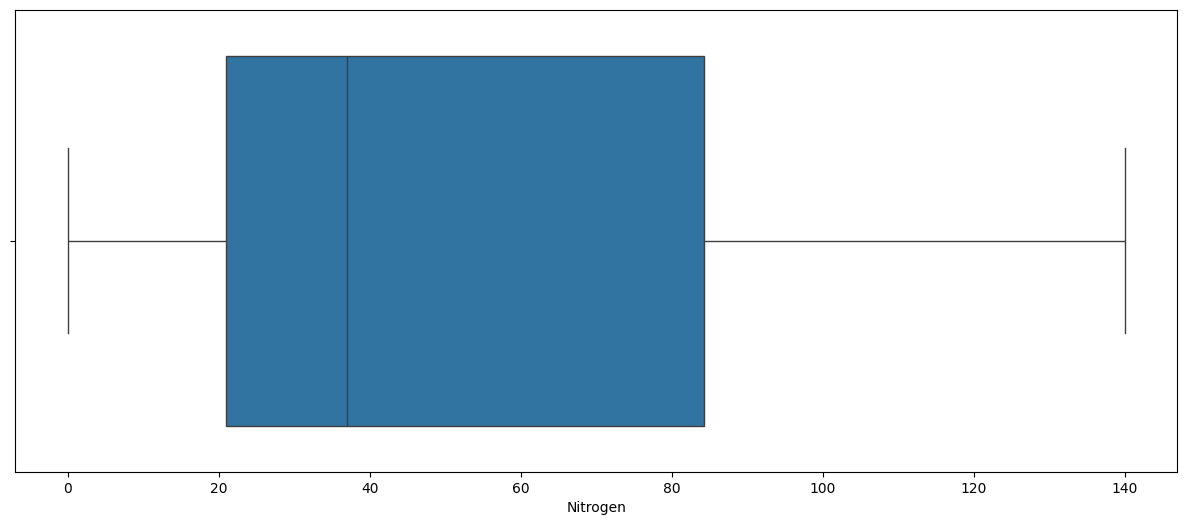

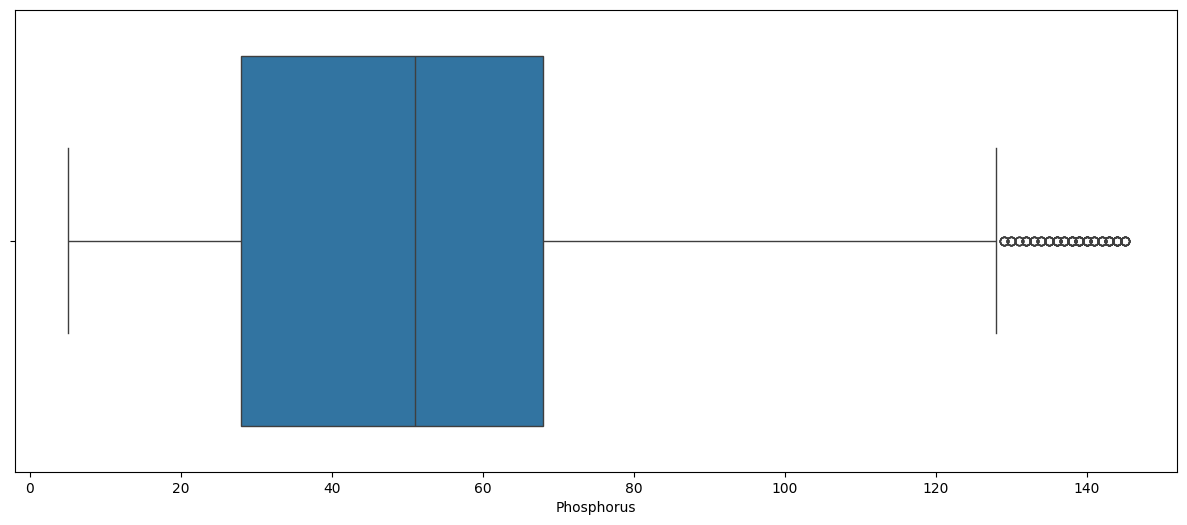

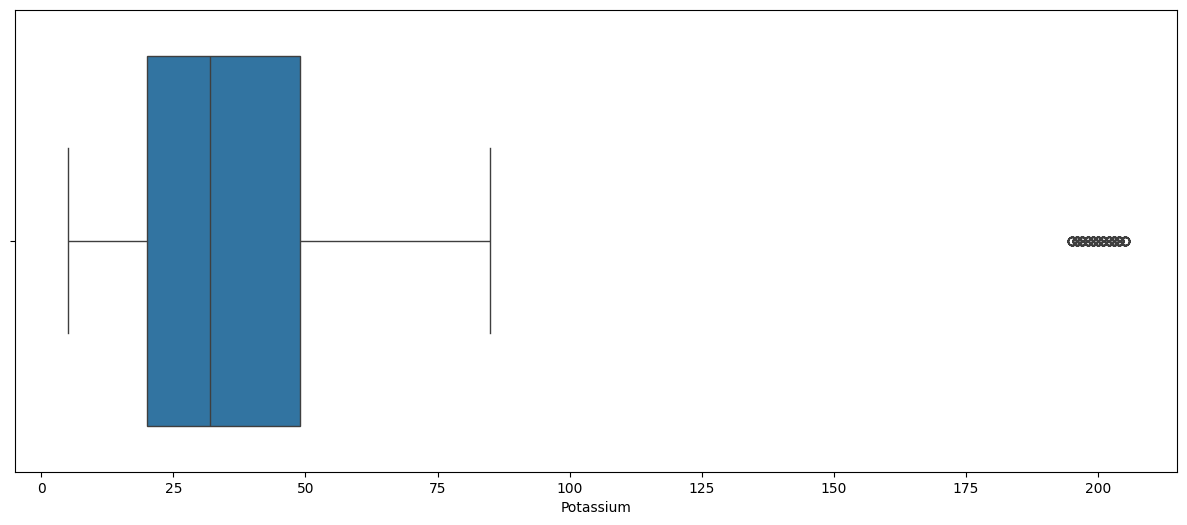

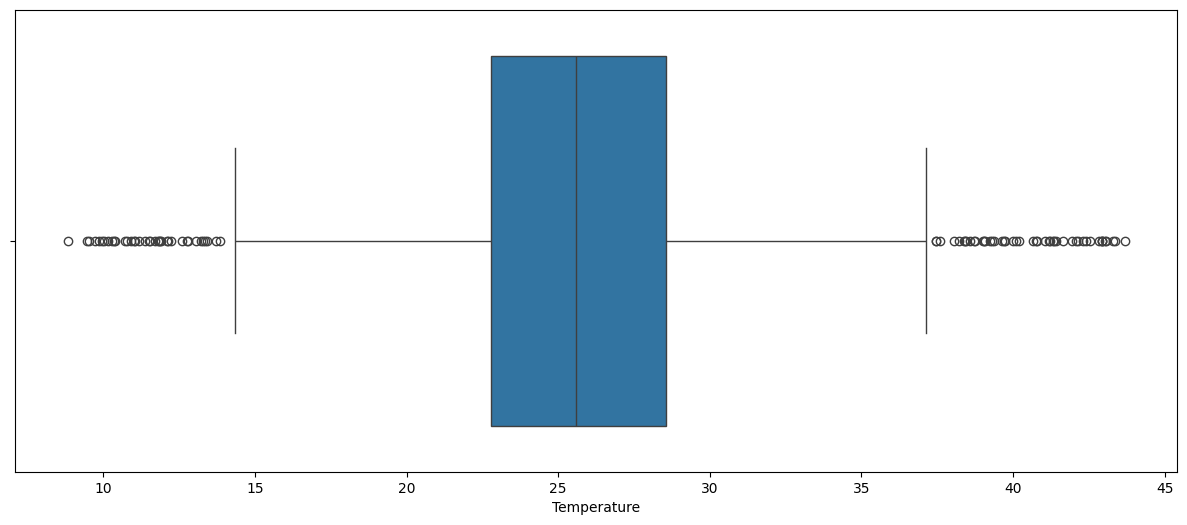

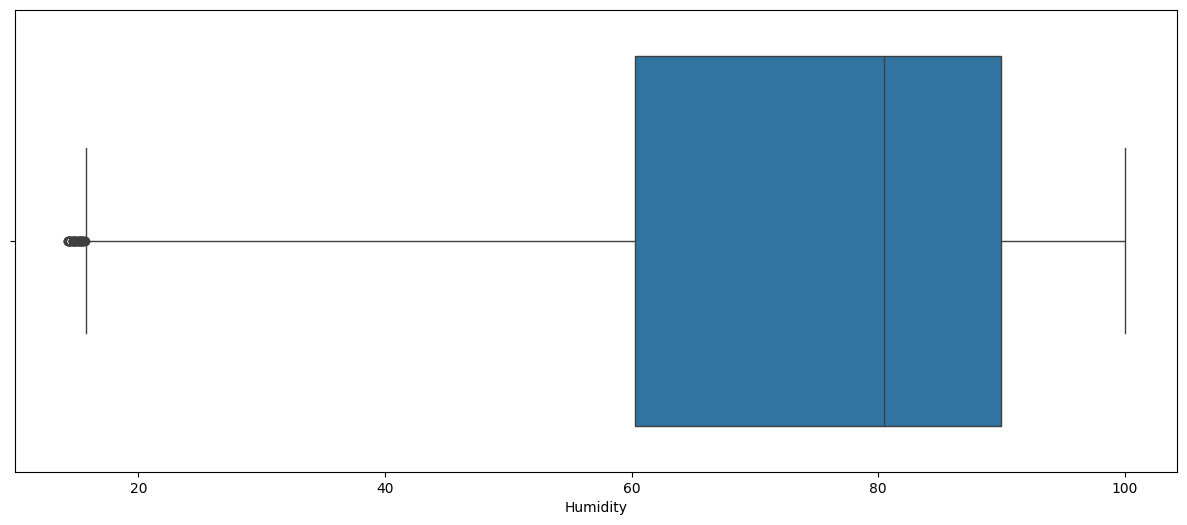

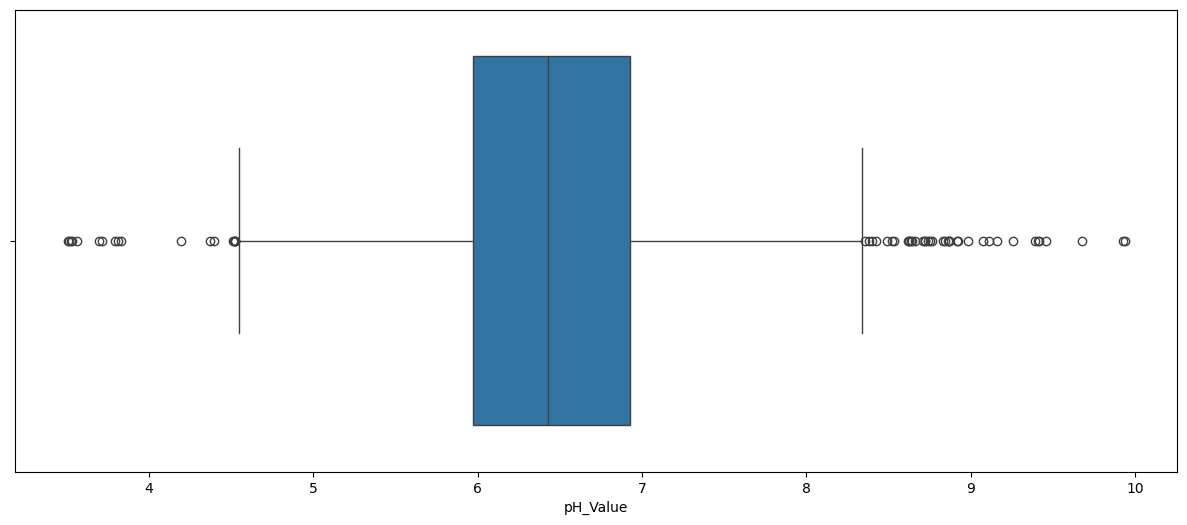

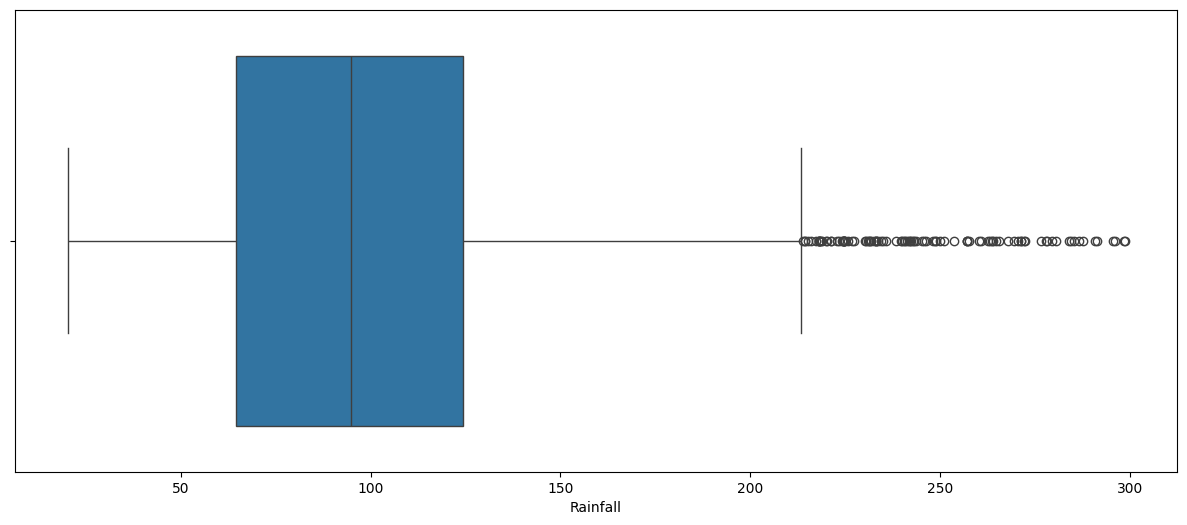

In [ ]:
for i in df1.columns:
# starts a loop where i iterates over each column in the dataframe df1.
# df1.columns returns the column names of df1, and the loop iterates through each of these column names.

    plt.figure(figsize = (15,6))
    # creates a new matplotlib figure with a specific size of 15 inches in width and 6 inches in height.
    # used to display the box plot for each column.

    sns.boxplot(x = df1[i])
    # 'x=' beacuse from version 0.12 of Seaborn,
    # we should pass the 'x' variable as a keyword argument explicitly, rather than as a positional argument.

    # creates a box plot using seaborn for the current column (i) in the loop.
    # it plots the distribution of values in the column i of the dataframe df1.

    plt.show()
    # displays the box plot for the current column i.
    # After displaying each box plot, the loop continues to the next column until all columns in df1 have been plotted.

BAR PLOT

A bar plot is a graphical representation of categorical data using bars
The length of each bar corresponds to the frequency, count, or sum of data within that category.
It's commonly used to compare values across categories and display frequency distributions.
Uses:

Comparison Across Categories: Compare values of a categorical variable across different categories.
Frequency Distribution: Display how often each category occurs in the dataset.
Summarize Aggregated Data: Communicate aggregated values such as total sales by region.
Trend Analysis: Show trends or patterns over time using a time-based categorical variable.
Compare Subgroups: Use grouped bar plots to compare subgroups within categories.
Highlight Outliers or Anomalies: Identify unusual patterns or outliers within categorical data.

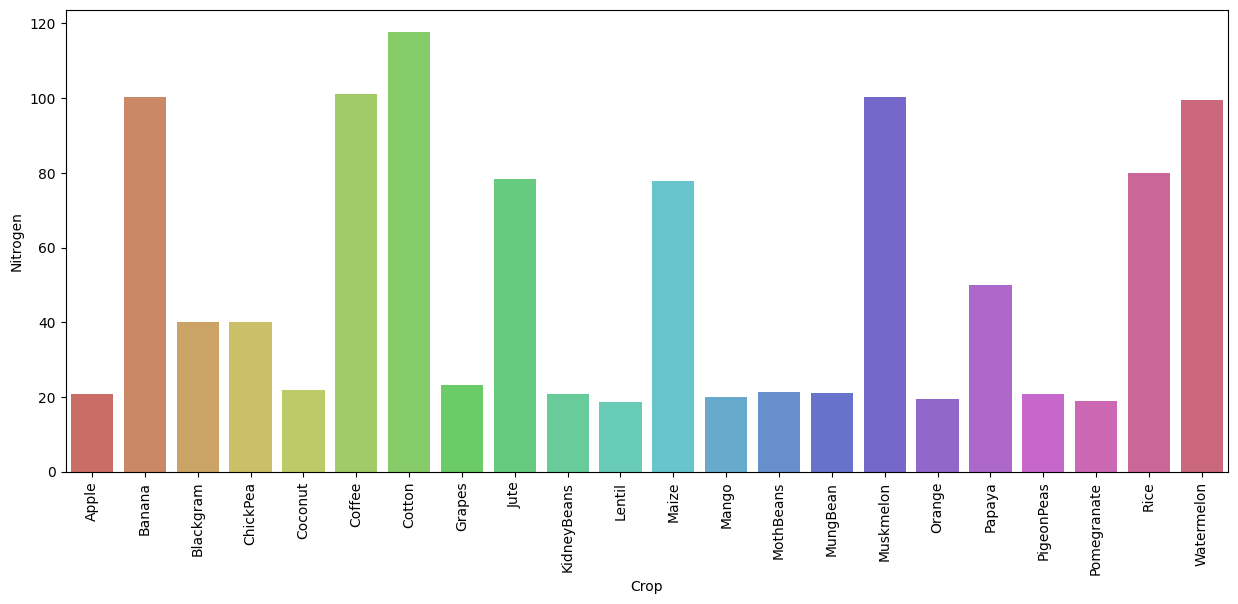

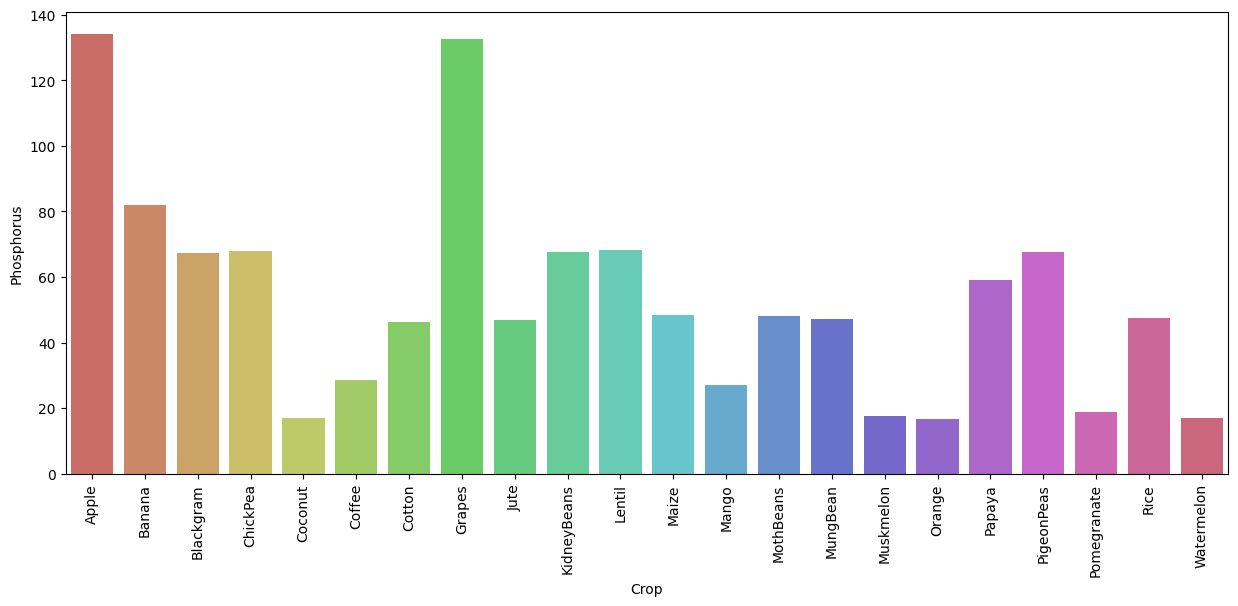

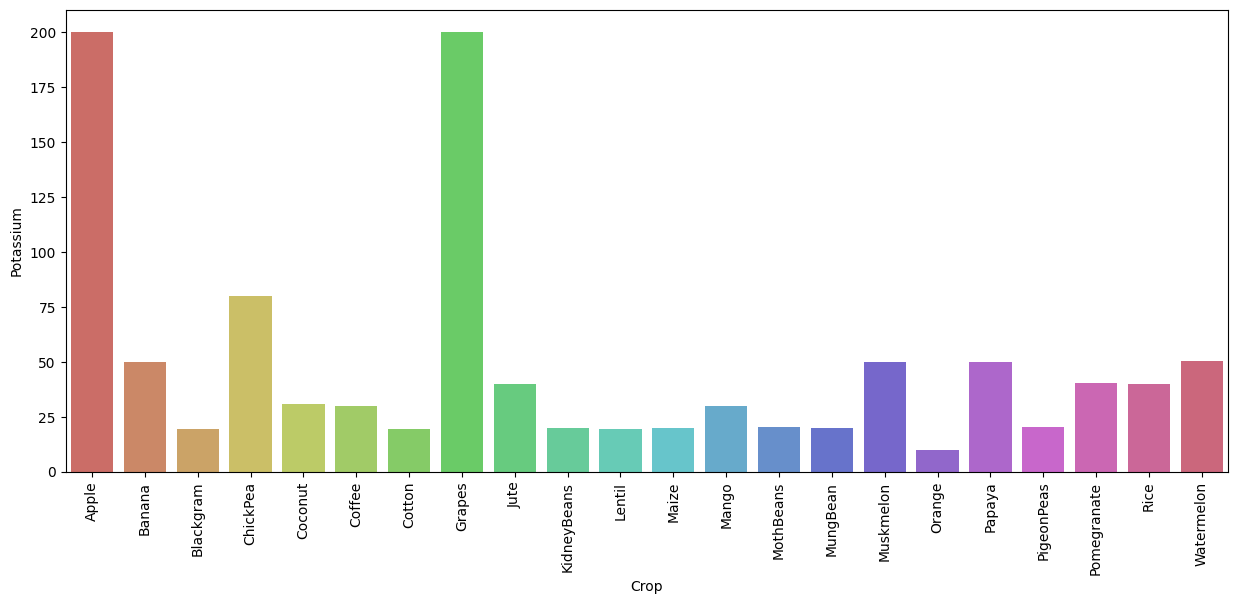

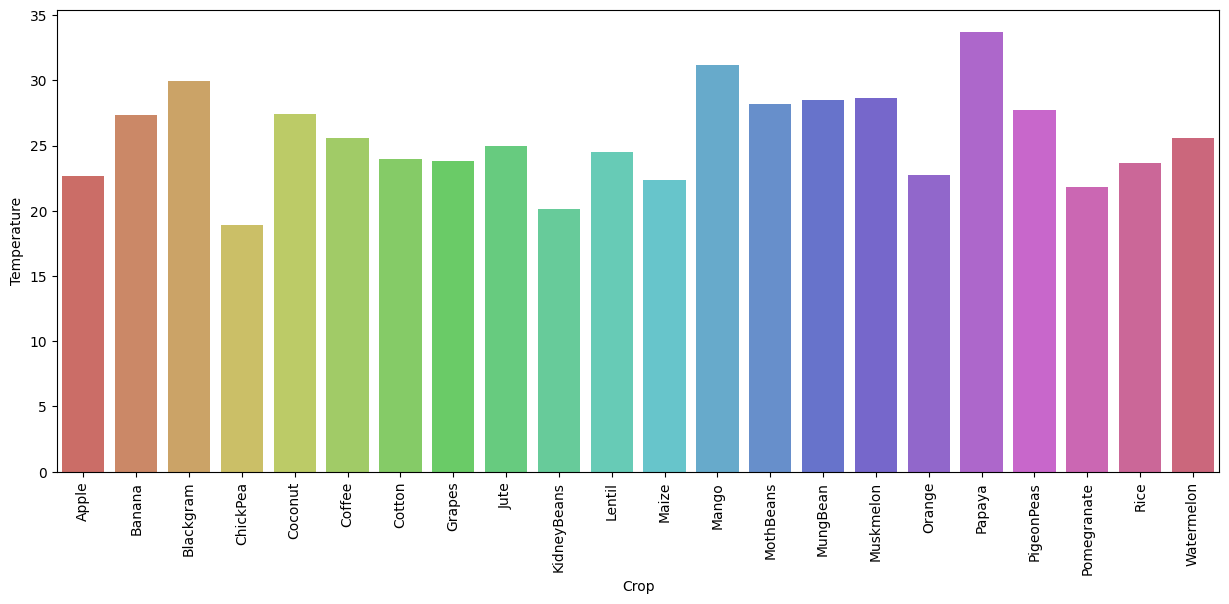

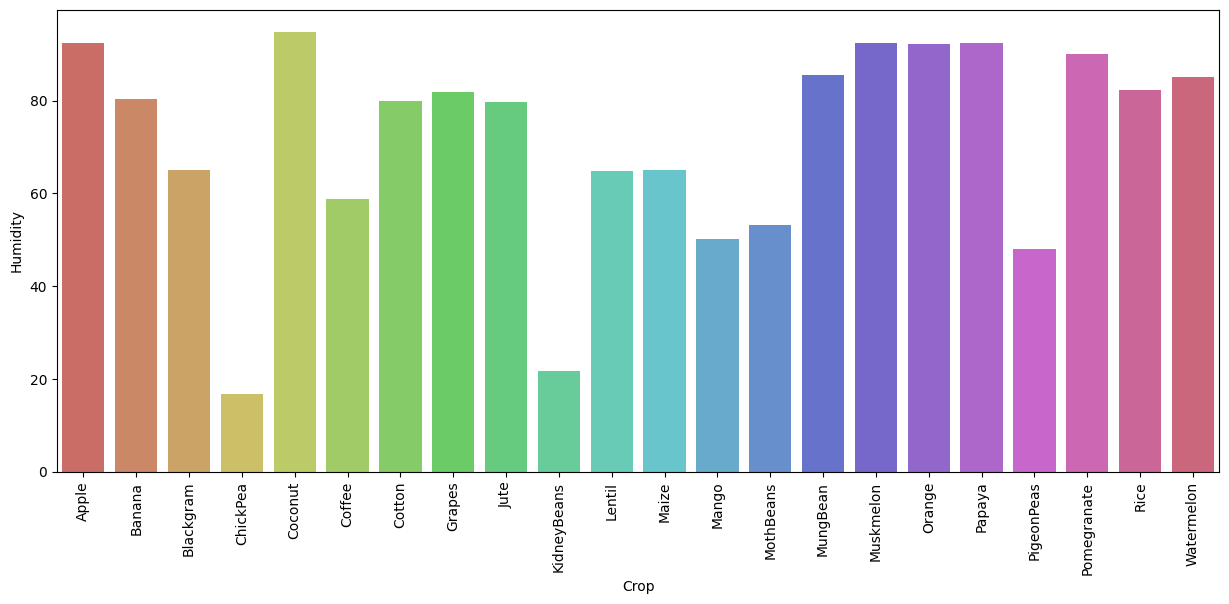

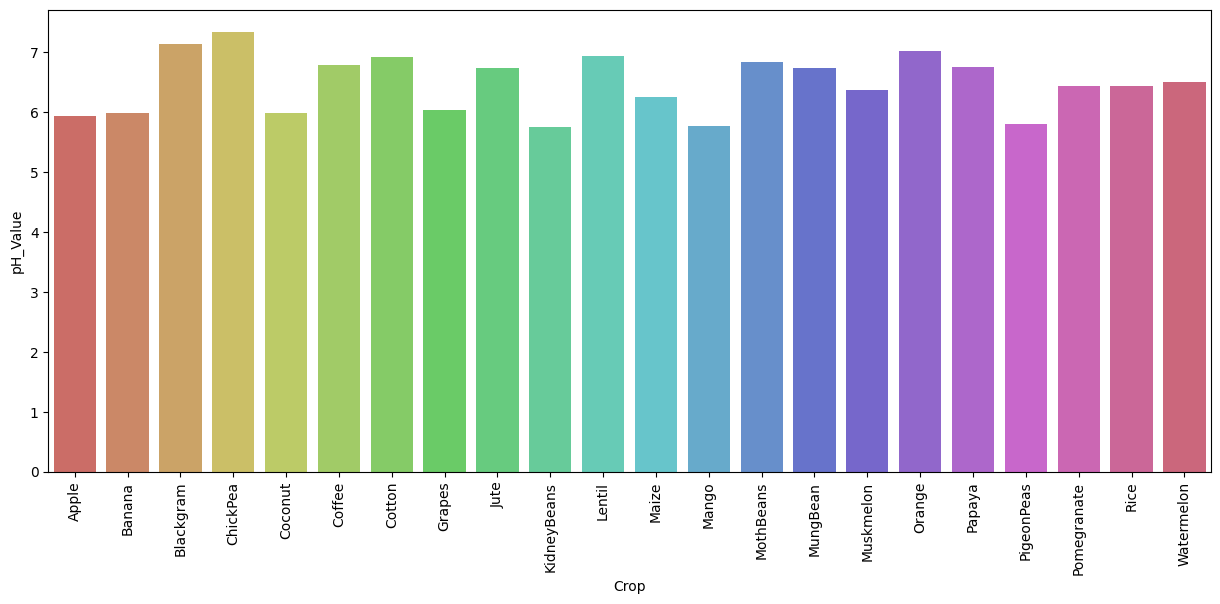

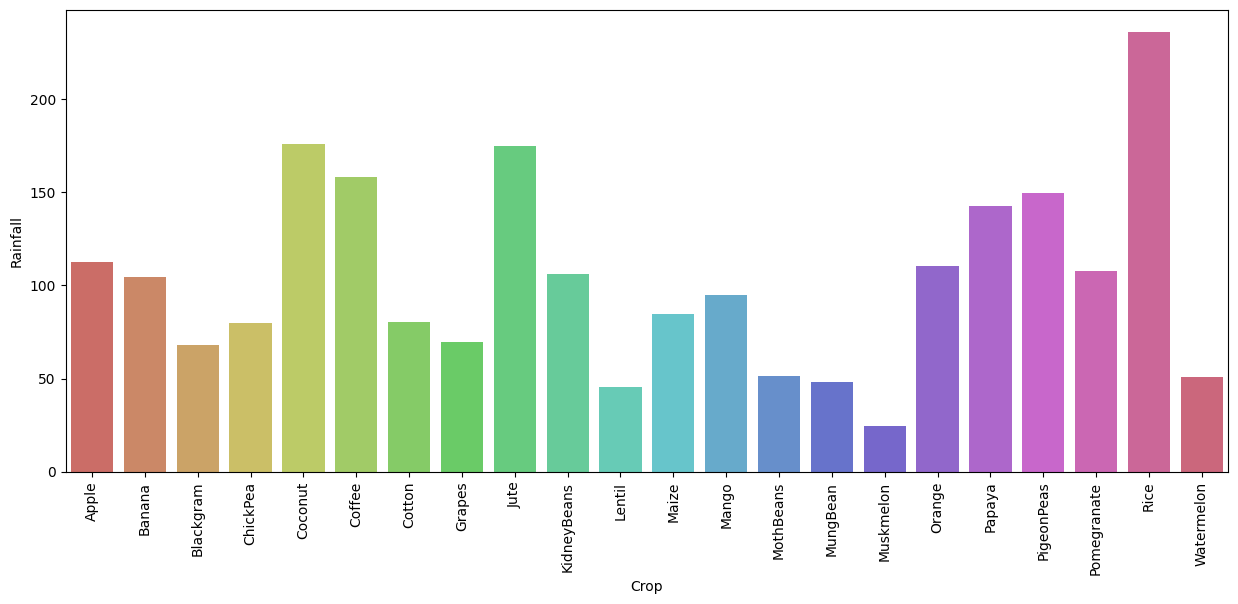

In [ ]:
for i in df1.columns:
    # starts a loop where i iterates over each column in the dataframe df1.
    # df1.columns returns the column names of df1, and the loop iterates through each of these column names.

    plt.figure(figsize = (15, 6))
    # creates a new matplotlib figure with a specific size of 15 inches in width and 6 inches in height.
    # used to display the bar plot for each column.

    sns.barplot(x = 'Crop', y = i, data = crop_summary_new, palette = 'hls')
    # creates a bar plot using seaborn for the current column (i) in the loop.
    # x = 'Crop' specifies the categorical variable on the x-axis (assuming 'Crop' is a column in crop_summary_new).
    # y = i specifies the numerical variable on the y-axis (current column in the loop).
    # data = crop_summary_new specifies the data to be used for plotting.
    # palette = 'hls' sets the color palette for the bars.

    plt.xticks(rotation = 90)
    # rotates the x-axis labels by 90 degrees for better readability.

    plt.show()
    # displays the bar plot for the current column i.
    # After displaying each bar plot, the loop continues to the next column until all columns in df1 have been plotted.

CORRELATION

Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables.
It ranges from -1 to 1, where:
1) 1 indicates a perfect positive linear relationship,
2) -1 indicates a perfect negative linear relationship, and
3) 0 indicates no linear relationship.
Uses:

Relationship Assessment: It helps in understanding how changes in one variable are associated with changes in another variable.
Variable Selection: Identifies variables that are strongly correlated, aiding in feature selection for predictive modeling.
Data Exploration: Used in exploratory data analysis (EDA) to uncover patterns and dependencies between variables.
Assumption Testing: In statistical analysis, correlation is used to test assumptions such as independence and multicollinearity.
Visual Representation: Correlation matrices and scatter plots visually represent relationships, aiding in data interpretation and communication.

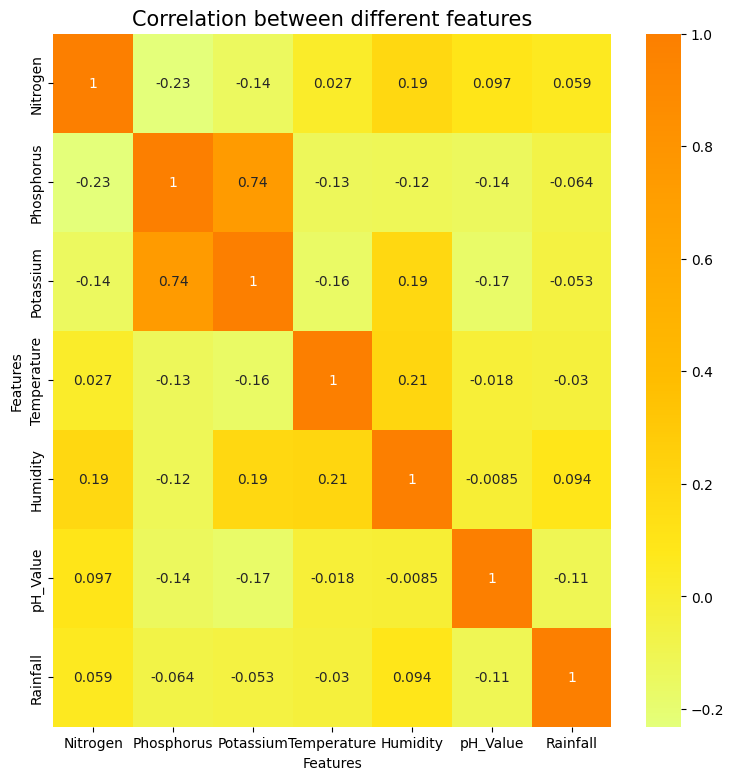

In [ ]:
df1.corr()
# calculates the pairwise correlation of columns in the dataframe df1.

fig, ax = plt.subplots(1, 1, figsize = (9,9))
# creates a matplotlib figure (fig) and axis (ax) with a size of 9 inches by 9 inches for the heatmap.

sns.heatmap(df1.corr(), annot = True, cmap = 'Wistia')
# generates a heatmap using Seaborn's heatmap function.
# It uses the correlation matrix (data.corr()) as the data.
# The annot=True argument displays the correlation values inside the heatmap cells.
# cmap='Wistia' sets the color scheme to 'Wistia'.

ax.set(xlabel = 'Features')
ax.set(ylabel = 'Features')
# sets the x-axis and y-axis labels of the heatmap to 'Features'.

plt.title('Correlation between different features', fontsize = 15, c = 'black')
# sets the title of the plot to 'Correlation between different features' with a font size of 15 and black color.

plt.show()
# displays the heatmap plot.

**Splitting the Dataset into Train Dataset and Test Dataset**

In [ ]:
X = df.drop(['Crop','Phosphorus'], axis = 1)
# assigns the dataframe df without the 'Crop' column (i.e., drops the Crop column) to the variable X.
# i.e., separates the features (independent variables) from the target variable before training a machine learning model.
# axis = 1 represents column axis (axis = 0 represents row axis; when nothing is mentioned then default is axis = 0).

y = df['Crop']
# assigns the 'Crop' column from the dataframe df to the variable y.
# This variable typically represents the target variable we are trying to predict in a machine learning context.

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
# X and y are assumed to be the feature matrix and target variable, respectively.
# test_size = 0.2 specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.
# shuffle=True (default) indicates that the data will be shuffled before splitting, which helps in randomizing the samples.
# random_state=0 (default: None) sets the random seed for reproducibility ensuring that the same random splits are generated every time.

# After running this code, we will have:

# 1) X_train: The training set of features.
# 2) X_test: The testing set of features.
# 3) y_train: The training set of target values.
# 4) y_test: The testing set of target values.

**BUILDING MODELS**

1) Decision Tree Classifier

In [ ]:


classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# criterion = 'entropy' specifies the criterion used to measure the quality of a split, similar to the Random Forest classifier.
# random_state = 0 sets the random seed for reproducibility, ensuring consistent results if the code is run multiple times.

classifier_dt.fit(X_train, y_train)
# used to train the Decision Tree classifier on the training data

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_dt = classifier_dt.predict(X_test)
# used to make predictions using a trained Decision Tree classifier (classifier_dt) on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_dt.
# Each element of y_pred_dt corresponds to the predicted value for the corresponding row in the test set.

In [ ]:
accuracy_dt = accuracy_score(y_pred_dt, y_test)
# calculates the accuracy of the predictions made by the Decision Tree classifier
# by comparing the predicted values (y_pred_dt) with the actual target values (y_test) from the test set.

print('Decision Tree Classifier model accuracy score: {0:0.4f}'.format(accuracy_dt))

Decision Tree Classifier model accuracy score: 0.9841


In [ ]:
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
print(f"Recall Score : {recall_dt}")
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
print(f"Precision Score : {precision_dt}")
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
print(f"F1 Score : {f1_dt}")

Recall Score : 0.9845225362872422
Precision Score : 0.9856790193474133
F1 Score : 0.9848161118058545


**2) Random Forest Classifier**

In [ ]:
train_score = {}
test_score = {}
n_estimators = np.arange(2, 100, 1)
for estimator in n_estimators:
    classifier_rf = RandomForestClassifier(n_estimators= estimator, criterion = "entropy")
    classifier_rf.fit(X_train, y_train)
    train_score[estimator]=classifier_rf.score(X_train, y_train)
    test_score[estimator]=classifier_rf.score(X_test, y_test)

print(f'Train Accuracies: \n{train_score}\n\nTest Accuracies:\n{test_score}')

Train Accuracies: 
{2: 0.977840909090909, 3: 0.9977272727272727, 4: 0.9971590909090909, 5: 0.9982954545454545, 6: 0.9988636363636364, 7: 0.9988636363636364, 8: 1.0, 9: 0.9994318181818181, 10: 1.0, 11: 0.9994318181818181, 12: 0.9994318181818181, 13: 1.0, 14: 1.0, 15: 1.0, 16: 0.9994318181818181, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 0.9994318181818181, 22: 0.9994318181818181, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 0.9994318181818181, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0, 57: 1.0, 58: 1.0, 59: 1.0, 60: 1.0, 61: 1.0, 62: 1.0, 63: 1.0, 64: 1.0, 65: 1.0, 66: 1.0, 67: 1.0, 68: 1.0, 69: 1.0, 70: 1.0, 71: 1.0, 72: 1.0, 73: 1.0, 74: 1.0, 75: 1.0, 76: 1.0, 77: 1.0, 78: 1.0, 79: 1.0, 80: 1.0, 81: 1.0, 82: 1.0, 83: 1.0, 84: 1.0, 85: 1.0, 86: 1.0, 87: 1.0, 88: 1.0, 89: 1.0, 90

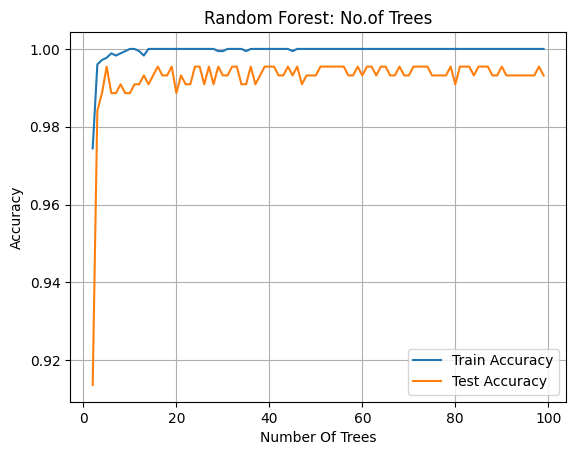

In [ ]:
plt.plot(n_estimators, train_score.values(), label="Train Accuracy")
plt.plot(n_estimators, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest: No.of Trees")
plt.legend()

plt.grid()
plt.show()

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators= 10, criterion = "entropy")
# n_estimators = 10 specifies that there will be 10 decision trees in the random forest classifier.
# criterion = "entropy" specifies the criterion used to measure the quality of a split.
# In this case, "entropy" is used, which measures the information gain based on the entropy of class labels.

classifier_rf.fit(X_train, y_train)
# used to train the Random Forest classifier on the training data

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)
# used to make predictions using a trained Random Forest classifier (classifier_rf) on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_rf.
# Each element of y_pred corresponds to the predicted value for the corresponding row in the test set.

In [ ]:
accuracy_rf = accuracy_score(y_pred_rf, y_test)
# calculates the accuracy of the predictions made by the model by comparing
# the predicted values (y_pred_rf) with the actual target values (y_test) from the test set.

print('Random Forest Classifier model accuracy score: {0:0.4f}'.format(accuracy_rf))

Random Forest Classifier model accuracy score: 0.9932


In [ ]:
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
print(f"Recall Score : {recall_rf}")
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
print(f"Precision Score: {precision_rf}")
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print(f"F1 Score: {f1_rf}")

Recall Score : 0.9945454545454546
Precision Score: 0.9934323471872879
F1 Score: 0.9938125320600405


**3) Logistic Regression**

In [ ]:
# from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0)
# random_state = 0 sets the random seed for reproducibility, ensuring consistent results if the code is run multiple times.

classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_lr = classifier_lr.predict(X_test)
# Make predictions using a trained Logistic Regression classifier on the test set X_test
# The predicted values for the target variable are stored in y_pred_lr
# Each element of y_pred_lr corresponds to the predicted value for the corresponding row in the test set.

In [ ]:
accuracy_lr = accuracy_score(y_pred_lr, y_test)
# calculates the accuracy of the predictions made by the model by comparing
# the predicted values (y_pred_lr) with the actual target values (y_test) from the test set.

print('Logistic Regression Classifier model accuracy score: {0:0.4f}'.format(accuracy_lr))

Logistic Regression Classifier model accuracy score: 0.9295


In [ ]:
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
print(f"Recall Score : {recall_lr}")
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
print(f"Precision Score : {precision_lr}")
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print(f"F1 Score : {f1_lr}")

Recall Score : 0.9336794037293923
Precision Score : 0.9327159100554823
F1 Score : 0.9319085703171207


**4) Support Vector Classifier**

In [ ]:
# from sklearn.svm import SVC

classifier_svm = SVC(kernel = 'linear', random_state = 0)
# kernel = 'linear' specifies that we want to use a linear kernel function for SVM.
# the linear kernel is commonly used for linearly separable data.
# random_state = 0 sets the random seed for reproducibility, ensuring consistent results if the code is run multiple times.

classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_svm = classifier_svm.predict(X_test)
# Make predictions using a trained SVM classifier on the test set X_test
# The predicted values for the target variable are stored in y_pred_svm
# Each element of y_pred_svm corresponds to the predicted value for the corresponding row in the test set.

In [ ]:
accuracy_svm = accuracy_score(y_pred_svm, y_test)
# calculates the accuracy of the predictions made by the model by comparing
# the predicted values (y_pred_svm) with the actual target values (y_test) from the test set.

print('SVM Classifier model accuracy score: {0:0.4f}'.format(accuracy_svm))

SVM Classifier model accuracy score: 0.9705


In [ ]:
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
print(f"Recall Score : {recall_svm}")
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
print(f"Precision Score : {precision_svm}")
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
print(f"F1 Score : {f1_svm}")

Recall Score : 0.9724411706831493
Precision Score : 0.9720271753764576
F1 Score : 0.9720672978435471


**5) K Nearest Neighbor Classifier**

In [ ]:
# Correctly split the data into training and testing sets


train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)

print(f'Train Accuracies: \n{train_score}\n\nTest Accuracies:\n{test_score}')

Train Accuracies: 
{2: 0.9823863636363637, 3: 0.9863636363636363, 4: 0.9767045454545454, 5: 0.9789772727272728, 6: 0.9681818181818181, 7: 0.9732954545454545, 8: 0.9653409090909091, 9: 0.9698863636363636, 10: 0.9630681818181818, 11: 0.9636363636363636, 12: 0.959659090909091, 13: 0.9590909090909091, 14: 0.9579545454545455, 15: 0.9607954545454546, 16: 0.9522727272727273, 17: 0.95625, 18: 0.9511363636363637, 19: 0.9528409090909091, 20: 0.9494318181818182, 21: 0.9517045454545454, 22: 0.946590909090909, 23: 0.9482954545454545, 24: 0.9414772727272728, 25: 0.9409090909090909, 26: 0.9380681818181819, 27: 0.9375, 28: 0.9363636363636364, 29: 0.9403409090909091}

Test Accuracies:
{2: 0.9454545454545454, 3: 0.9545454545454546, 4: 0.9545454545454546, 5: 0.9590909090909091, 6: 0.9545454545454546, 7: 0.9545454545454546, 8: 0.9522727272727273, 9: 0.9613636363636363, 10: 0.9409090909090909, 11: 0.9522727272727273, 12: 0.9409090909090909, 13: 0.9454545454545454, 14: 0.9386363636363636, 15: 0.943181818181

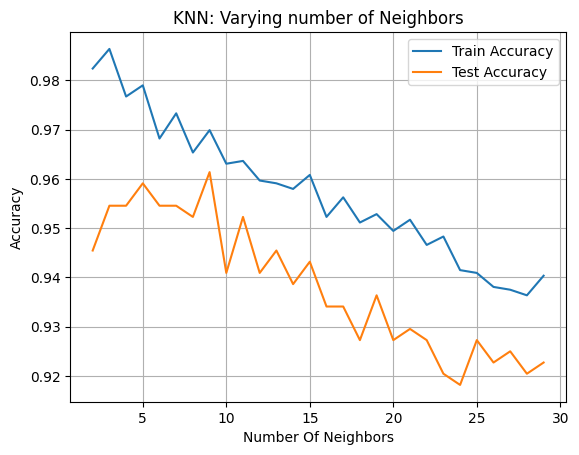

In [ ]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()

plt.grid()
plt.show()

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 15)
# n_neighbors = 5 parameter specifies the number of neighbors to consider when making predictions is 15.

classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred_knn = classifier_knn.predict(X_test)
# Make predictions using a trained KNN classifier on the test set X_test
# The predicted values for the target variable are stored in y_pred_knn
# Each element of y_pred_knn corresponds to the predicted value for the corresponding row in the test set.

In [ ]:
accuracy_knn = accuracy_score(y_pred_knn, y_test)
# calculates the accuracy of the predictions made by the model by comparing
# the predicted values (y_pred_knn) with the actual target values (y_test) from the test set.

print('KNN Classifier model accuracy score: {0:0.4f}'.format(accuracy_knn))

KNN Classifier model accuracy score: 0.9432


In [ ]:
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
print(f"Recall Score : {recall_knn}")
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
print(f"Precision Score : {precision_knn}")
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
print(f"F1 Score : {f1_knn}")


Recall Score : 0.9495657877476059
Precision Score : 0.9501939021306609
F1 Score : 0.9444965422872728


In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        18
   Blackgram       0.81      1.00      0.90        22
    ChickPea       1.00      1.00      1.00        23
     Coconut       0.83      1.00      0.91        15
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        16
      Grapes       1.00      1.00      1.00        18
        Jute       0.83      0.95      0.89        21
 KidneyBeans       0.91      1.00      0.95        20
      Lentil       0.77      1.00      0.87        17
       Maize       1.00      0.89      0.94        18
       Mango       0.84      1.00      0.91        21
   MothBeans       1.00      0.68      0.81        25
    MungBean       1.00      1.00      1.00        17
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00        23
      Papaya       1.00    

**6) Naive Bayes Classifier**

In [ ]:
# from sklearn.naive_bayes import GaussianNB

classifier_nb = GaussianNB()

classifier_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = classifier_nb.predict(X_test)
# Make predictions using a trained Naive Bayes classifier on the test set X_test
# The predicted values for the target variable are stored in y_pred_nb
# Each element of y_pred_nb corresponds to the predicted value for the corresponding row in the test set.

In [ ]:
accuracy_nb = accuracy_score(y_pred_nb, y_test)
# calculates the accuracy of the predictions made by the model by comparing
# the predicted values (y_pred_nb) with the actual target values (y_test) from the test set.

print('Naive Bayes Classifier model accuracy score: {0:0.4f}'.format(accuracy_nb))

Naive Bayes Classifier model accuracy score: 0.9909


In [ ]:
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
print(f"Recall Score : {recall_nb}")
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
print(f"Precision Score : {precision_nb}")
f1_nb = f1_score(y_test, y_pred_nb, average='macro')
print(f"F1 Score : {f1_nb}")

Recall Score : 0.9927272727272727
Precision Score : 0.9917929292929292
F1 Score : 0.9918419979210253


In [ ]:
# from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_nb)
print(report)

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        18
   Blackgram       1.00      1.00      1.00        22
    ChickPea       1.00      1.00      1.00        23
     Coconut       1.00      1.00      1.00        15
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        16
      Grapes       1.00      1.00      1.00        18
        Jute       0.88      1.00      0.93        21
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.94      1.00      0.97        17
       Maize       1.00      1.00      1.00        18
       Mango       1.00      1.00      1.00        21
   MothBeans       1.00      0.96      0.98        25
    MungBean       1.00      1.00      1.00        17
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00        23
      Papaya       1.00    

**Comparing all the Classifier models**

Comparison of Accuracy:

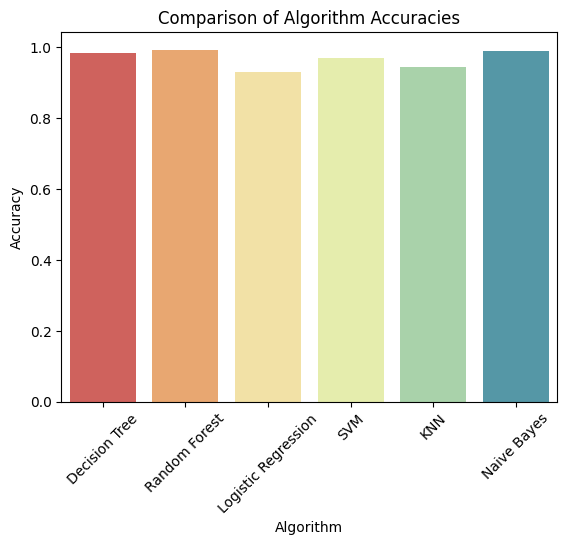

In [ ]:
accuracy_scores = [accuracy_dt, accuracy_rf, accuracy_lr, accuracy_svm, accuracy_knn, accuracy_nb]
# creating a list of accuracy scores.

algorithm_labels = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Naive Bayes']
# creating generic model labels.

sns.barplot(x = algorithm_labels, y = accuracy_scores, palette = 'Spectral')
# Creating a bar plot using Seaborn with generic algorithm labels.

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
# Setting labels and title

plt.xticks(rotation = 45)
# adjusting the rotation angle of x-axis labels.

plt.show()
# displaying the plot.

Comparison of Recall Score:



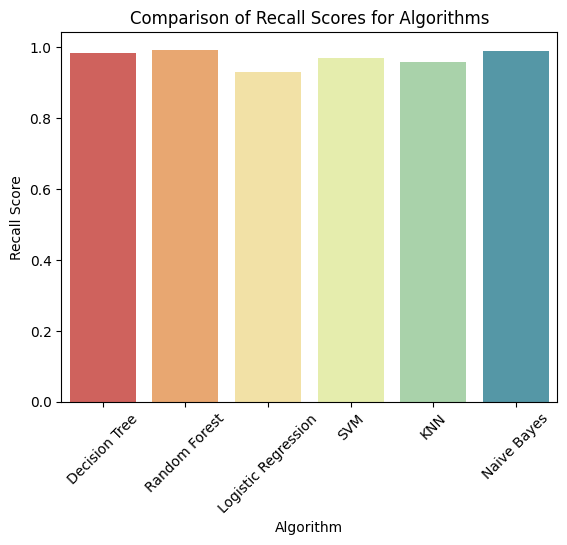

In [ ]:
recall_scores = [recall_dt, recall_rf, recall_lr, recall_svm, recall_knn, recall_nb]
# creating a list of recall scores.

algorithm_labels = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Naive Bayes']
# creating generic model labels.

sns.barplot(x = algorithm_labels, y = accuracy_scores, palette = 'Spectral')
# Creating a bar plot using Seaborn with generic algorithm labels.

plt.xlabel('Algorithm')
plt.ylabel('Recall Score')
plt.title('Comparison of Recall Scores for Algorithms')
# Setting labels and title

plt.xticks(rotation = 45)
# adjusting the rotation angle of x-axis labels.

plt.show()
# displaying the plot.

Comparison of Precision Values:

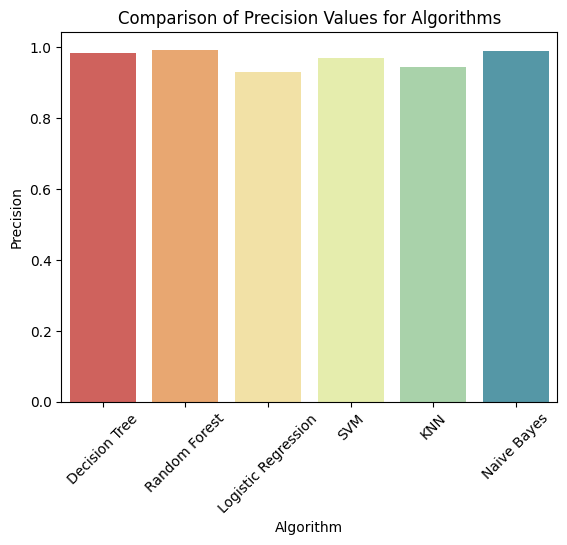

In [ ]:
precision_scores = [precision_dt, precision_rf, precision_lr, precision_svm, precision_knn, precision_nb]
# creating a list of precision values.

algorithm_labels = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Naive Bayes']
# creating generic model labels.

sns.barplot(x = algorithm_labels, y = accuracy_scores, palette = 'Spectral')
# Creating a bar plot using Seaborn with generic algorithm labels.

plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.title('Comparison of Precision Values for Algorithms')
# Setting labels and title

plt.xticks(rotation = 45)
# adjusting the rotation angle of x-axis labels.

plt.show()
# displaying the plot.


Comparison of F1 scores:

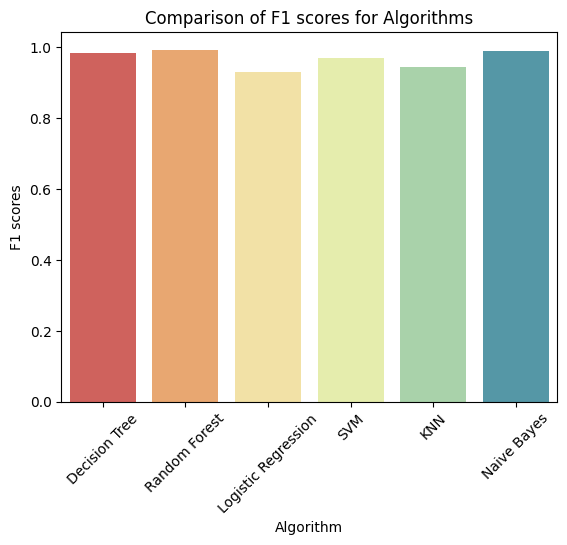

In [ ]:
f1_scores = [f1_dt, f1_rf, f1_lr, f1_svm, f1_knn, f1_nb]
# creating a list oF f1 scores.

algorithm_labels = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Naive Bayes']
# creating generic model labels.

sns.barplot(x = algorithm_labels, y = accuracy_scores, palette = 'Spectral')
# Creating a bar plot using Seaborn with generic algorithm labels.

plt.xlabel('Algorithm')
plt.ylabel('F1 scores')
plt.title('Comparison of F1 scores for Algorithms')
# Setting labels and title

plt.xticks(rotation = 45)
# adjusting the rotation angle of x-axis labels.

plt.show()
# displaying the plot.
